# Business Problem

Your company is expanding in to new industries to diversify its portfolio. 

Specifically, they are interested in **purchasing and operating airplanes** for **commercial and private enterprises**, but do not know anything about the potential risks of aircraft. 

You are charged with determining which aircraft are the **lowest risk** for the company to start this new business endeavor. 

You must then translate your findings into actionable insights that the head of the new aviation division can use to **help decide which aircraft to purchase**.

## How Do We Define Risk

- Initial thoughts on risk is we sum the injury columns and divide by the total uninjured column. We should also weigh these values by the amount of people on board (sum of injured/uninjured). 

- Curious if 'Amateur.Built' flights are more dangerous.

- Are all injuries weighted the same? 
    - I would like my plane rides to be injury free but what consititues a minor/major injury? 
    - Stubbed toe as a minor injury isn't related to the quality of the plane. 
    
    
Business Owner - US Based - Domestic Flights 

- Flight Training Program based in the US, only domestic flights 
- Compare Planes v Helicopters v Weight-Shifters 

# Exploratory Data Analysis

In [1]:
#Package imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
#Import csv
df = pd.read_csv('data_files/AviationData.csv', encoding='latin')

<ipython-input-2-b90336193025>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_files/AviationData.csv', encoding='latin')


In [96]:
df.shape

(88889, 31)

In [172]:
df

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Data Types and Missing Values

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      88889 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport_code            50132 non-null  object 
 9   airport_name            52704 non-null  object 
 10  injury_severity         87889 non-null  object 
 11  aircraft_damage         85695 non-null  object 
 12  aircraft_category       32287 non-null  object 
 13  registration_number     87507 non-null  object 
 14  make                    88826 non-null

In [97]:
#Changing the naming convention of columns
df.columns = df.columns.str.lower().str.replace('.', '_')
df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [98]:
#Check for duplicates inside of the csv
df_no_duplicates = df.drop_duplicates()

df.shape

(88889, 31)

In [175]:
#Percent of missing values in each column
df.isna().sum() * 100 / len(df)

event_id                   0.000000
investigation_type         0.000000
accident_number            0.000000
event_date                 0.000000
location                   0.058500
country                    0.254250
latitude                  61.320298
longitude                 61.330423
airport_code              43.601570
airport_name              40.708074
injury_severity            1.124999
aircraft_damage            3.593246
aircraft_category         63.677170
registration_number        1.554748
make                       0.070875
model                      0.103500
amateur_built              0.114750
number_of_engines          6.844491
engine_type                7.982990
far_description           63.974170
schedule                  85.845268
purpose_of_flight          6.965991
air_carrier               81.271023
total_fatal_injuries      12.826109
total_serious_injuries    14.073732
total_minor_injuries      13.424608
total_uninjured            6.650992
weather_condition          5

## Descriptive Statistics

In [176]:
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Analysis of Statistics
- There are large outlier inside of all of the injury metrics. However, these outliers are important and give us valuable information about the riskiness of the aircraft. 

- We should not remove these outliers. 

In [178]:
df.mode().T

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
event_id,20001212X19172,20001214X45071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investigation_type,Accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident_number,CEN22FA424,CEN22LA149,CEN22LA346,CEN23MA034,DCA22LA135,DCA22LA201,DCA22WA089,DCA22WA130,DCA22WA158,DCA22WA167,...,ERA22LA103,ERA22LA119,ERA22LA364,ERA22LA379,GAA22WA241,WPR22FA309,WPR22LA143,WPR22LA201,WPR23LA041,WPR23LA045
event_date,1982-05-16,1984-06-30,2000-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,"ANCHORAGE, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,332739N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0112457W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airport_code,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airport_name,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration

In [100]:
def column_info(dataframe, column):
    """
    Provides a view into the row information provided in each column
    -
    Input:
    dataframe : Pandas DataFrame
    columns_list: list 
    -
    Output:
        Prints:
            - A preview of the first 5 values in the column.
            - Value counts of the column.
            - The percentage of missing values in the column.
    """
    preview = dataframe[column].head()
    value_counts = dataframe[column].value_counts()
    percent_missing = dataframe[column].isna().sum() * 100 / len(dataframe)
    
    print("Preview of the first 5 rows in the column:")
    print(preview)
    print("\nValue counts of the column:")
    print(value_counts)
    print("\nPercentage of missing values in the column:")
    print(f"{percent_missing:.2f}%") 

### event_id

In [101]:
#Preview the row entries for the column
column_info(df,'event_id')

Preview of the first 5 rows in the column:
0    20001218X45444
1    20001218X45447
2    20061025X01555
3    20001218X45448
4    20041105X01764
Name: event_id, dtype: object

Value counts of the column:
event_id
20001212X19172    3
20001214X45071    3
20220730105623    2
20051213X01965    2
20001212X16765    2
                 ..
20001211X14216    1
20001211X14239    1
20001211X14207    1
20001211X14204    1
20221230106513    1
Name: count, Length: 87951, dtype: int64

Percentage of missing values in the column:
0.00%


**Review:**

The event_id serves as a unqiue indentifier for each row entry. These are for reference to search the accident on the NTSB aviation accident database. 

**Recommendation**

They are not needed to determine the business problem. 

### investigation_type

In [102]:
#Preview the row entries for the column
column_info(df,'investigation_type')

Preview of the first 5 rows in the column:
0    Accident
1    Accident
2    Accident
3    Accident
4    Accident
Name: investigation_type, dtype: object

Value counts of the column:
investigation_type
Accident    85015
Incident     3874
Name: count, dtype: int64

Percentage of missing values in the column:
0.00%


**Review:**

Events are classified as either being accidents or incidents. 

According to the Code of Federal Regulations, "an accident is defined as an occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight and all such persons have disembarked, and in which any person suffers death or serious injury, or in which the aircraft receives substantial damage. For purposes of this part, the definition of “aircraft accident” includes “unmanned aircraft accident,” as defined herein."

An incident is defined as "an occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations."

https://www.ecfr.gov/current/title-49/subtitle-B/chapter-VIII/part-830/subpart-A/section-830.2

**Recommendation:**

Narrow our search to only include records that are labeled as accident. 
- This would result in about 5% of the total data being dropped.

After reviewing the report status for accidents there is a large number of records the mention the pilot as the source of the accident. 

**Review:**

After reviewing the report status column, there isn't enough conclusive information to use the column. Inside of the column, there are 6,384 NaN values out of 88,889. 92% of the rows are represented with data. 

However, the most common entries in the column are:

- Probable Cause : 61754
- Foreign : 1999
- Factual : 167

**Recommendation:**

We make a column identifying explicit pilot error by searching for the keyword of pilot. The keyword while general is reflective of pilot error given that each row represents an accident and that when a description is given, it is telling us about the error that occurred that caused the accident. 

**Examples:**

- "The pilot’s decision to perform a takeoff from a perpendicular taxiway rather than the airport runway, which led to the airplane striking trees at the end of the departure path."

- "The pilot’s failure to maintain airplane control during the landing roll on a snow-covered runway surface."

- "The pilot’s failure to retract the flaps during a go-around from a bounced landing, which resulted in a collision with trees then terrain."

### accident_number

In [105]:
#Preview the row entries for the column
column_info(df,'accident_number')

Preview of the first 5 rows in the column:
0    SEA87LA080
1    LAX94LA336
2    NYC07LA005
3    LAX96LA321
4    CHI79FA064
Name: accident_number, dtype: object

Value counts of the column:
accident_number
CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
             ..
LAX92FA065    1
ANC92T#A12    1
MIA92LA049    1
NYC92LA048    1
ERA23LA097    1
Name: count, Length: 88863, dtype: int64

Percentage of missing values in the column:
0.00%


**Review:**

Similar to event_id, the accident_number serves as a unqiue indentifier for each row entry. These are for reference to search the accident on the NTSB aviation accident database. 

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal. 

### event_date

In [106]:
#Preview the row entries for the column
column_info(df,'event_date')

Preview of the first 5 rows in the column:
0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
Name: event_date, dtype: object

Value counts of the column:
event_date
1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: count, Length: 14782, dtype: int64

Percentage of missing values in the column:
0.00%


**Review:**

There is an event_date for every row. However, the date is currently cast as an object (string). 

**Recommendation** 

Cast the column as datetime64. 

### location and country

In [107]:
#Preview the row entries for the column
column_info(df,'location')

Preview of the first 5 rows in the column:
0    MOOSE CREEK, ID
1     BRIDGEPORT, CA
2      Saltville, VA
3         EUREKA, CA
4         Canton, OH
Name: location, dtype: object

Value counts of the column:
location
ANCHORAGE, AK          434
MIAMI, FL              200
ALBUQUERQUE, NM        196
HOUSTON, TX            193
CHICAGO, IL            184
                      ... 
Corona De Tucso, AZ      1
Lithonia, GA             1
BONANZA, OR              1
NEWPORT, PA              1
Brasnorte,               1
Name: count, Length: 27758, dtype: int64

Percentage of missing values in the column:
0.06%


In [108]:
#Check for missing values
df['location'].isna().sum()

52

In [109]:
#Row entry review

#Copy the DataFrame so no data is lost
df_copy = df.copy()

#Fill NaN values with a blank string
df_copy['location'].fillna('', inplace=True)

#Apply the filter
df_copy[df_copy['location'].str.contains('NEAR')]['location']

33        NEAR LAS VEGAS, NV
50       NEAR BAKERSFIEL, CA
75          NEAR BOZEMAN, MT
95          NEAR NUIQSUT, AK
127         NEAR LANSING, MI
                ...         
24104     NEAR TALKEETNA, AK
24268      NEAR COLD BAY, AK
28190       NEAR ILIAMNA, AK
33498      NEAR SKWENTNA, AK
48186      NEAR MUSKEGON, MI
Name: location, Length: 167, dtype: object

In [110]:
#Show if there is a country listed for location values that are NaNs
df['location'][df['country'] != 'United States'].value_counts()

location
ATLANTIC OCEAN             81
SAN JUAN                   53
London, United Kingdom     48
PACIFIC OCEAN              45
GULF OF MEXICO             30
                           ..
BUHL, GERMANY               1
BANBURY, UNITED KINGDOM     1
Airolo, Switzerland         1
BERGAMO, ITALY              1
Brasnorte,                  1
Name: count, Length: 4731, dtype: int64

**Review:**

The location column while providing more detail than the country file has some issues. 

First is that not every entry has an accurate city location. 

Second is that for foreign countries, there are multiple comma delimters indentifying the city. Additionally, the country is listed inside of the location.

**Examples**:

- Los Mochis, Sinaloa, Mexico
- Ledbury, Herefordshire, United Kingdom
- Panama City, Panama
- Ji'an City Jiangxi Province, China

**Recommendation** 
- Use only the state identifier in the location column and drop the 52 rows that do not have a state identifier. 
    - Use only the rows that are located inside of the United States. 
        - Doing so would drop 4731 rows out of 88837
        - Dropping both the NaNs and the rows located outside of the United States would result in about 6% of the total data being dropped. 

### latitude and longitude

In [111]:
#Preview the row entries for the column
column_info(df,'latitude')

Preview of the first 5 rows in the column:
0          NaN
1          NaN
2    36.922223
3          NaN
4          NaN
Name: latitude, dtype: object

Value counts of the column:
latitude
332739N      19
335219N      18
334118N      17
32.815556    17
324934N      16
             ..
343255N       1
345911N       1
393035N       1
039413N       1
373829N       1
Name: count, Length: 25592, dtype: int64

Percentage of missing values in the column:
61.32%


In [112]:
#Preview the row entries for the column
column_info(df,'longitude')

Preview of the first 5 rows in the column:
0          NaN
1          NaN
2   -81.878056
3          NaN
4          NaN
Name: longitude, dtype: object

Value counts of the column:
longitude
0112457W       24
1114342W       18
1151140W       17
-104.673056    17
1114840W       16
               ..
1064131W        1
1114414W        1
0023500E        1
0934042W        1
0121410W        1
Name: count, Length: 27156, dtype: int64

Percentage of missing values in the column:
61.33%


**Review:**

There is a large amount of missing values inside both columns. 

**Recommendation:** 

The columns can be dropped. The information provided in the columns is not pertinent to the business goal and there is large amount of missing values.

### airport_code and airport_name

In [113]:
#Preview the row entries for the column
column_info(df,'airport_code')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: airport_code, dtype: object

Value counts of the column:
airport_code
NONE    1488
PVT      485
APA      160
ORD      149
MRI      137
        ... 
7NJ9       1
CWV        1
5QA        1
M55        1
EIKH       1
Name: count, Length: 10374, dtype: int64

Percentage of missing values in the column:
43.60%


In [114]:
#Preview the row entries for the column
column_info(df,'airport_name')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: airport_name, dtype: object

Value counts of the column:
airport_name
Private                           240
PRIVATE                           224
Private Airstrip                  153
NONE                              146
PRIVATE STRIP                     111
                                 ... 
STEHEKIN                            1
OTTAWA MUNICIPAL                    1
DWIGHT AIRPORT                      1
PHOENIX DEER VALLEY MUNI            1
WICHITA DWIGHT D EISENHOWER NT      1
Name: count, Length: 24870, dtype: int64

Percentage of missing values in the column:
40.71%


**Review:**

There is a large amount of missing values inside both columns. It is unclear whether the airport code/name was the destination of the plane or where the plane took off from. 

**Recommendation:** 

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

### injury_severity

In [115]:
#Preview the row entries for the column
column_info(df,'injury_severity')

Preview of the first 5 rows in the column:
0    Fatal(2)
1    Fatal(4)
2    Fatal(3)
3    Fatal(2)
4    Fatal(1)
Name: injury_severity, dtype: object

Value counts of the column:
injury_severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

Percentage of missing values in the column:
1.12%


**Review:**

The column reflects both the status of the injury as well as a count of those injured. 


**Recommendation:** 

There are 1000 missing rows from the column. If we were to drop these values, we would drop only around 1% of the total data. But, in dropping the values we would lose valuable data. 

As such, we should replace the NaNs with unknown. 

Additionally, we should remove the count that follows the description of the injury as there are value counts later on in the table. 

### aircraft_damage

In [116]:
#Preview the row entries for the column
column_info(df,'aircraft_damage')

Preview of the first 5 rows in the column:
0    Destroyed
1    Destroyed
2    Destroyed
3    Destroyed
4    Destroyed
Name: aircraft_damage, dtype: object

Value counts of the column:
aircraft_damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

Percentage of missing values in the column:
3.59%


**Review:**

The column reflects both the status of the injury as well as a count of those injured. 


**Recommendation:** 

There are 1000 missing rows from the column. If we were to drop these values, we would drop only around 1% of the total data. But, in dropping the values we would lose valuable data. 

As such, we should replace the NaNs with unknown. 

Additionally, we should remove the count that follows the description of the injury as there are value counts later on in the table. 

### aircraft_category

In [117]:
#Preview the row entries for the column
column_info(df,'aircraft_category')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: aircraft_category, dtype: object

Value counts of the column:
aircraft_category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

Percentage of missing values in the column:
63.68%


In [118]:
#Checking if the aircraft category is null is there identifiying information
df[df['aircraft_category'].isnull()][['make', 'model']]

,make,model
0,Stinson,108-3
1,Piper,PA24-180
2,Cessna,172M
3,Rockwell,112
4,Cessna,501
...,...,...
88883,AIR TRACTOR,AT502
88884,PIPER,PA-28-151
88885,BELLANCA,7ECA
88887,CESSNA,210N


**Review:**

The category contains many types of aircrafts and there is a lot of rows that do not indicate what type of aircraft is listed. 

There is already a category labeled as 'Unknown' inside of the column. 

**Recommendation:** 

Work will need to be done inside of the make and model columns to determine whether the type of aircraft can be identified. 

If it cannot be determined, transform the row entries into lower case and add to the unknown label. 

### registration_number

In [119]:
#Preview the row entries for the column
column_info(df,'registration_number')

Preview of the first 5 rows in the column:
0    NC6404
1    N5069P
2    N5142R
3    N1168J
4     N15NY
Name: registration_number, dtype: object

Value counts of the column:
registration_number
NONE      344
UNREG     126
UNK        13
USAF        9
N20752      8
         ... 
N93478      1
N519UA      1
N8840W      1
N21040      1
N9026P      1
Name: count, Length: 79104, dtype: int64

Percentage of missing values in the column:
1.55%


**Review:**

It is unclear why there is missing values or duplicated values inside of this column as one would assume that every aircrafts registration number would be unique. 

No documentation on this column could be located to provide further information. 

There is already a category identifying that there is no registration number as well as a unregistered column. 

**Recommendation:** 

The column can be dropped. The information provided in the column is not pertinent to the business goal. 

### make and model

In [120]:
#Preview the row entries for the column
column_info(df, 'make')

Preview of the first 5 rows in the column:
0     Stinson
1       Piper
2      Cessna
3    Rockwell
4      Cessna
Name: make, dtype: object

Value counts of the column:
make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

Percentage of missing values in the column:
0.07%


In [121]:
#Preview the row entries for the column
column_info(df,'model')

Preview of the first 5 rows in the column:
0       108-3
1    PA24-180
2        172M
3         112
4         501
Name: model, dtype: object

Value counts of the column:
model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

Percentage of missing values in the column:
0.10%


In [139]:
#Display that the column is not normalized

#Use the copied Dataframe from the location and country review
df_copy

#Fill NaN values with a blank string
df_copy['model'].fillna('', inplace=True)

#Search the model category for the Piper PA-24 model aircraft
filtered_df = df_copy[df_copy['model'].str.contains('PA-24')][['make', 'model']]

filtered_df

,make,model
23,Piper,PA-24-180
41,Piper,PA-24-250
58,Piper,PA-24-250
254,Piper,PA-24-180
295,Piper,PA-24-250
...,...,...
88080,PIPER,PA-24-250
88131,PIPER,PA-24-260
88348,PIPER,PA-24-250
88731,PIPER,PA-24-250


**Review**

- make
    - There are duplicated values due to the column not being normalized.  

- model
    - The model column is not normalized either.
    - The model while different for each make tends to hold additional information seperated by a hypen. 
        - For the Piper PA-24, the PA-24 is the real model, the -180 or -250 are the same model of plane with different horse power. 
        - https://planephd.com/wizard/details/479/PIPER-PA-24-180-Comanche-specifications-performance-operating-cost-valuation

**Recommendation**

- make
    - The missing rows should be dropped as the business goal is to determine the which aircraft has the least amount of risk.

- model
    - While the number of missing values is higher, the model is less important than the make in some regards. If the make is listed, we should not drop the row if the model is missing. 
    - We can determine which make of aircraft has the least amount of risk and out of the least riskiest make which is the safest model. 

### amateur_built

In [142]:
#Preview the row entries for the column
column_info(df, 'amateur_built')

Preview of the first 5 rows in the column:
0    No
1    No
2    No
3    No
4    No
Name: amateur_built, dtype: object

Value counts of the column:
amateur_built
No     80312
Yes     8475
Name: count, dtype: int64

Percentage of missing values in the column:
0.11%


**Review**

The column is self explanatory and does not have a lot of missing values. 

**Recommendation**

I would like to cast the column as a boolean, however, given the missing values an unknown category should be added in. 

### number_of_engines

In [144]:
#Preview the row entries for the column
column_info(df, 'number_of_engines')

Preview of the first 5 rows in the column:
0    1.0
1    1.0
2    1.0
3    1.0
4    NaN
Name: number_of_engines, dtype: float64

Value counts of the column:
number_of_engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

Percentage of missing values in the column:
6.84%


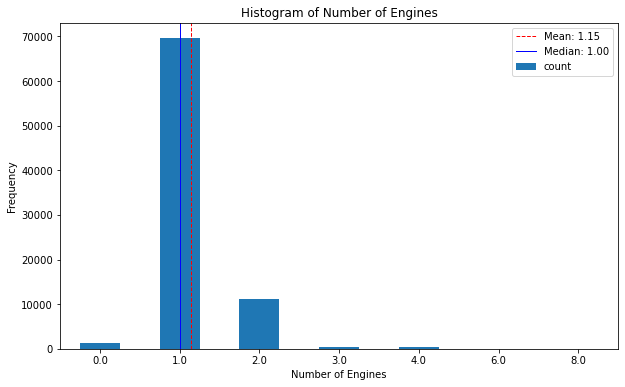

In [171]:
#Get values for histogram
value_counts = df['number_of_engines'].value_counts().sort_index()

#Calculate mean and median
mean_num_engines = df['number_of_engines'].mean()
median_num_engines = df['number_of_engines'].median()

# Plot a histogram of the value counts
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Engines')
plt.xticks(rotation=0)

# Add vertical lines for mean and median
plt.axvline(x=mean_num_engines, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_num_engines:.2f}')
plt.axvline(x=median_num_engines, color='blue', linestyle='-', linewidth=1, label=f'Median: {median_num_engines:.2f}')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Review**

The column is self explanatory and contains missing values. 

**Recommendation**

The distibution of the column is right skewed. As such, we should impute the missing values using the median. 

### far_description

In [145]:
#Preview the row entries for the column
column_info(df, 'far_description')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: far_description, dtype: object

Value counts of the column:
far_description
091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                          

**Review**

The column contains references to the Federal Aviation Regulations (FARs) or similar regulatory categories. The FARs are a set of rules prescribed by the Federal Aviation Administration (FAA) governing all aviation activities in the United States.

The values are not normalized and contain duplicates. 

**Examples**

- Part 91: General Aviation
    - Covers general operating and flight rules for all aircraft not governed by other specific parts (e.g., private pilots, corporate flights, etc.).
    
- PUBU: Public Use
    - Refers to aircraft operated by government agencies or other public entities for official purposes.

- https://www.faa.gov/hazmat/air_carriers/operations

-https://www.ecfr.gov/current/title-14

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

Since we are looking at commercial or private aircrafts the classifications listed while they could apply do not aid in determining risk. 

### schedule

In [146]:
#Preview the row entries for the column
column_info(df, 'schedule')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: schedule, dtype: object

Value counts of the column:
schedule
NSCH    4474
UNK     4099
SCHD    4009
Name: count, dtype: int64

Percentage of missing values in the column:
85.85%


**Review**

Unsure of the value contents of this column.

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

### purpose_of_flight

In [147]:
#Preview the row entries for the column
column_info(df, 'purpose_of_flight')

Preview of the first 5 rows in the column:
0    Personal
1    Personal
2    Personal
3    Personal
4    Personal
Name: purpose_of_flight, dtype: object

Value counts of the column:
purpose_of_flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                       

**Review**

The column already contains an unknown category. 

**Recommendation**

The column is valuable to the business goal and as such we will fill in the missing values with unknowns, adding to the already created column. 

### air_carrier

In [148]:
#Preview the row entries for the column
column_info(df, 'air_carrier')

Preview of the first 5 rows in the column:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: air_carrier, dtype: object

Value counts of the column:
air_carrier
Pilot                        258
American Airlines             90
United Airlines               89
Delta Air Lines               53
SOUTHWEST AIRLINES CO         42
                            ... 
WOODY CONTRACTING INC          1
Rod Aviation LLC               1
Paul D Franzon                 1
TRAINING SERVICES INC DBA      1
MC CESSNA 210N LLC             1
Name: count, Length: 13590, dtype: int64

Percentage of missing values in the column:
81.27%


**Review**

This column is providing insight into both flights performed within the traditional airline schedule and chartered flights. 

**Recommendation**

The column can be dropped. The information provided in the column is not pertinent to the business goal and there is large amount of missing values.

### total_fatal_injuries, total_serious_injuries, total_minor_injuries and total_uninjured

In [152]:
#Preview the row entries for the columns listed
columns = [
    'total_fatal_injuries',
    'total_serious_injuries',
    'total_minor_injuries',
    'total_uninjured'
]

for column in columns:
    print('\n', column)
    column_info(df, column)


 total_fatal_injuries
Preview of the first 5 rows in the column:
0    2.0
1    4.0
2    3.0
3    2.0
4    1.0
Name: total_fatal_injuries, dtype: float64

Value counts of the column:
total_fatal_injuries
0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
156.0        1
68.0         1
31.0         1
115.0        1
176.0        1
Name: count, Length: 125, dtype: int64

Percentage of missing values in the column:
12.83%

 total_serious_injuries
Preview of the first 5 rows in the column:
0    0.0
1    0.0
2    NaN
3    0.0
4    2.0
Name: total_serious_injuries, dtype: float64

Value counts of the column:
total_serious_injuries
0.0      63289
1.0       9125
2.0       2815
3.0        629
4.0        258
5.0         78
6.0         41
7.0         27
9.0         16
10.0        13
8.0         13
13.0         9
11.0         6
26.0         5
14.0         5
12.0         5
20.0         3
25.0         3
28.0         3
21.0         2
59.0         2
50.0         2


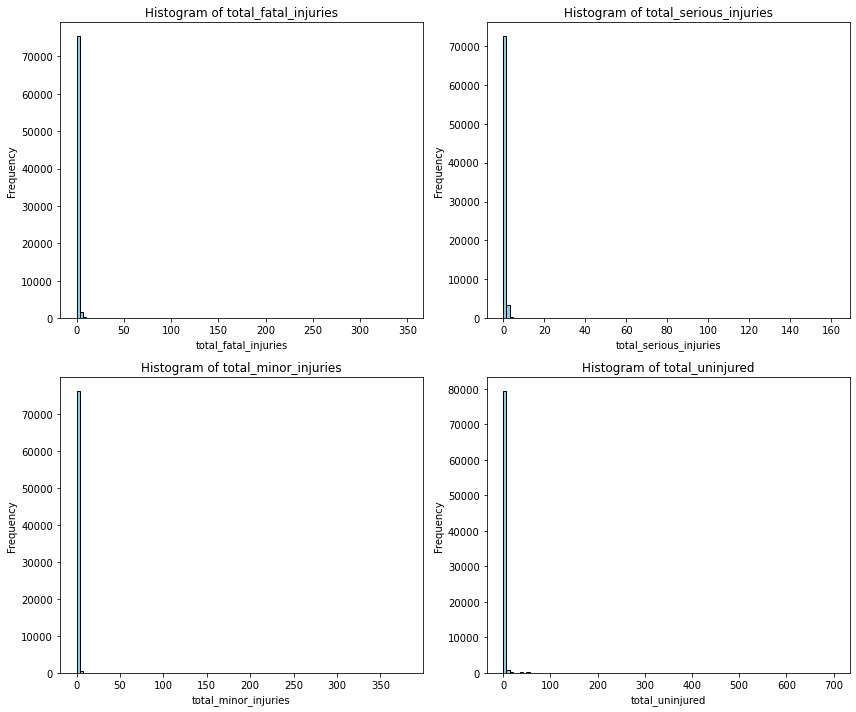

In [185]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, column in enumerate(columns):
    # Drop NaN values before plotting
    data = df[column].dropna()
    
    # Plot histogram
    axes[i].hist(data, bins=100, color='skyblue', edgecolor='black')
    
    # Set title for each subplot
    axes[i].set_title(f'Histogram of {column}')
    
    # Set labels for x and y axes
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

**Review**

This columns branches off of the injury_severity column. That column provided both the injury status as well as the count of injured persons (in some cases). 

**Recommendation**

- Create a new column that sums the total amount of injured persons on each flight.
- The distibution of the columns are all right skewed. As such, we should impute the missing values using the median. 

### weather_condition

In [153]:
column_info(df, 'weather_condition')

Preview of the first 5 rows in the column:
0    UNK
1    UNK
2    IMC
3    IMC
4    VMC
Name: weather_condition, dtype: object

Value counts of the column:
weather_condition
VMC    77303
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64

Percentage of missing values in the column:
5.05%


**Review**

**Recommendation**

### broad_phase_of_flight

In [154]:
column_info(df, 'broad_phase_of_flight')

Preview of the first 5 rows in the column:
0      Cruise
1     Unknown
2      Cruise
3      Cruise
4    Approach
Name: broad_phase_of_flight, dtype: object

Value counts of the column:
broad_phase_of_flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

Percentage of missing values in the column:
30.56%


**Review**

This column reports at what stage of the flight did the accident/incident occur. 

There is a large amount of missing values inside of this column as well as both unknown and other categories. 

**Recommendation**
- Collapse the other and unknown row entries. 
- Fill NaN's with unknowns.

### report_status

In [155]:
column_info(df, 'report_status')

Preview of the first 5 rows in the column:
0    Probable Cause
1    Probable Cause
2    Probable Cause
3    Probable Cause
4    Probable Cause
Name: report_status, dtype: object

Value counts of the column:
report_status
Probable Cause                                                                                                                                                       61754
Foreign                                                                                                                                                               1999
<br /><br />                                                                                                                                                           167
Factual                                                                                                                                                                145
The pilot's failure to maintain directional control during the landing roll.                   

In [103]:
#Preview the row entries for the column
#Looking specifically at the Accident column as these are the values of interest
df[df['investigation_type'] == 'Accident'][['investigation_type' , 'report_status']]['report_status'].unique()

array(['Probable Cause', 'Factual', 'Foreign', ...,
       'The pilot did not ensure adequate clearance from construction vehicles during taxi.',
       'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.',
       'The pilot\x92s loss of control due to a wind gust during landing.'],
      dtype=object)

In [ ]:
report_status_accident = df[df['investigation_type'] == 'Accident']['report_status']

# Count the occurrences of each word
word_counts = Counter()
for text in report_status_accident:
    if isinstance(text, str): #removes the error caused by floats - NaN's are floats
        words = text.split()
        for word in words:
            if 'pilot' in word or 'instructor' in word:
                word_counts.update([word])
    
# Get the most common words and their frequencies
most_common_words = word_counts.most_common()

most_common_words[:20]

**Review:**

After reviewing the report status column, there isn't enough conclusive information to use the column. Inside of the column, there are 6,384 NaN values out of 88,889. 92% of the rows are represented with data. 

However, the most common entries in the column are:

- Probable Cause : 61754
- Foreign : 1999
- Factual : 167

**Recommendation:**

We make a column identifying explicit pilot error by searching for the keyword of pilot. The keyword while general is reflective of pilot error given that each row represents an accident and that when a description is given, it is telling us about the error that occurred that caused the accident. 

The new column will be a boolean value. 

**Examples:**

- "The pilot’s decision to perform a takeoff from a perpendicular taxiway rather than the airport runway, which led to the airplane striking trees at the end of the departure path."

- "The pilot’s failure to maintain airplane control during the landing roll on a snow-covered runway surface."

- "The pilot’s failure to retract the flaps during a go-around from a bounced landing, which resulted in a collision with trees then terrain."

### publication_date

In [156]:
column_info(df, 'publication_date')

Preview of the first 5 rows in the column:
0           NaN
1    19-09-1996
2    26-02-2007
3    12-09-2000
4    16-04-1980
Name: publication_date, dtype: object

Value counts of the column:
publication_date
25-09-2020    17019
26-09-2020     1769
03-11-2020     1155
31-03-1993      452
25-11-2003      396
              ...  
29-11-2004        1
29-08-2001        1
18-11-2004        1
17-12-1996        1
29-12-2022        1
Name: count, Length: 2924, dtype: int64

Percentage of missing values in the column:
15.49%


**Review**

Given that we have the event_date column (with no missing values), the publication date is not as important of a column. 

**Recommendation**

Since we are only using the report_status column to create a new boolean column, we do not need the information listed in this column and can drop it from the datset. 

The information provided in the column is not pertinent to the business goal and there are missing values.